In [1]:
# Import libraries
import glob
import numpy as np
import matplotlib.pyplot as plt
import corner
from IPython.display import display, Math
plt.rcParams['font.size'] = '17'

In [2]:
like_data = np.loadtxt('./All_dataOutput/loglikelihood_chain.dat')
para_data = np.loadtxt('./All_dataOutput/parameters_chain.dat')
labels =['$\\alpha_P$', '$\sigma$']

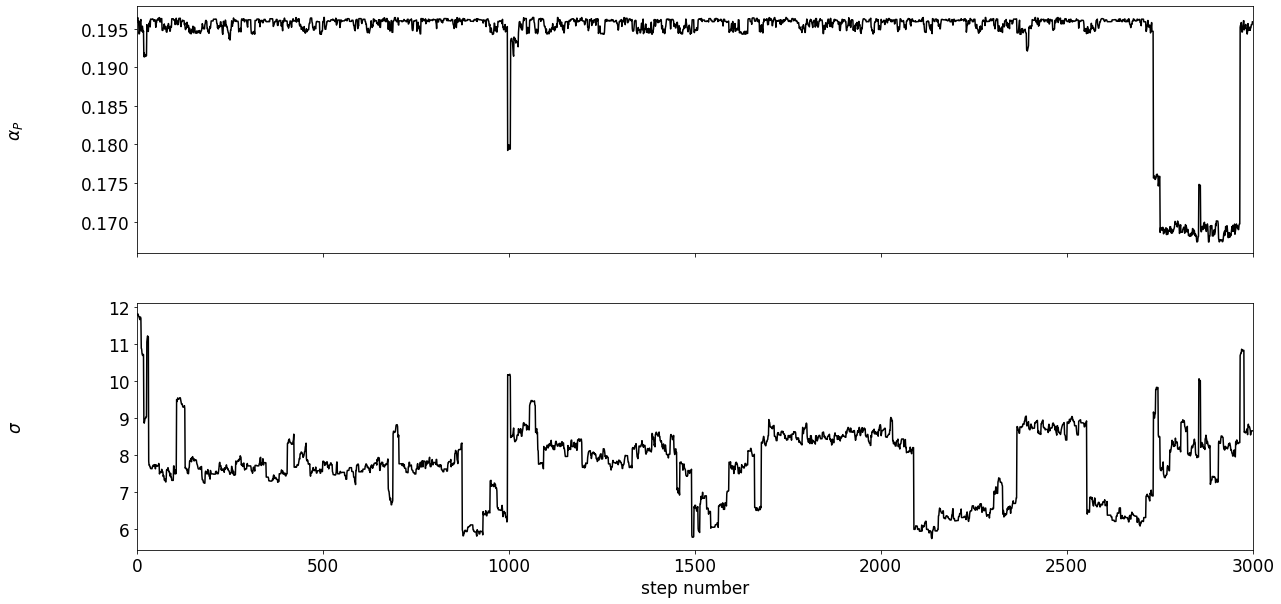

In [3]:
#flat_para = para_data[20:]
#fig = corner.corner(para_data, labels=labels);
fig, axes = plt.subplots(2, figsize=(20, 10), sharex=True)
for i in range(2):
    ax = axes[i]
    ax.plot(para_data[:,i], "k")
    ax.set_xlim(0, len(para_data))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number");

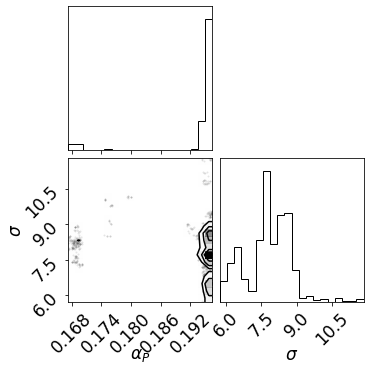

In [4]:
fig = corner.corner(para_data, labels=labels);

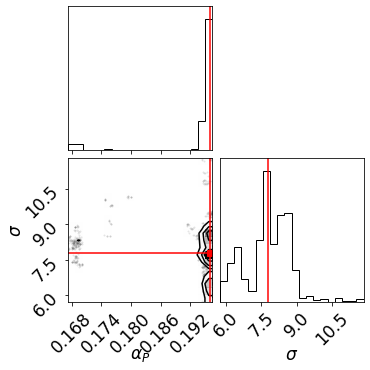

In [6]:
queso = para_data
value2 = np.median(queso, axis=0)
my_file = open('./All_dataOutput/parameters_prol.dat','w')
my_file.write(str(value2[0]))
my_file.close()
ndim = len(queso[0])
fig = corner.corner(queso, labels=labels);
axes = np.array(fig.axes).reshape((ndim, ndim))
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value2[i], color="r")
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value2[xi], color="r")
        ax.axhline(value2[yi], color="r")
        ax.plot(value2[xi], value2[yi], "sr")